In [5]:
# Consumo de drogas

import pandas as pd

url ='C:\\Users\\52444\\Desktop\\Data Science\\DataScienceCoder\\Data Sets\\fish-surveys-all.csv'
dfFISH = pd.read_csv(url)


dfFISH.head()

C:\Users\52444\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (1,3,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,country,survey_date,ma_name,reef_zone,location_name,location_status,lat,lon,transect_no,water_depth,...,density_ind_ha,length,size_class,biomass_kg_ha,a,b,family,level1_name,level2_name,year
0,Mozambique,2021-01-29,Sanculo,back,Ilha-sede1,Reserve,-15.05441,40.72473,1,7.0,...,240.0,2.5,0-5,0.221405,0.070307,2.809417,Pomacentridae,Nampula,Ilha de Mocambique,2020
1,Mozambique,2020-12-23,Memba-sede,back,Mecumbo,Managed Access,-14.20380,40.54742,2,10.0,...,40.0,25.5,21-30,10.261146,0.019597,2.927000,Siganidae,Nampula,Memba,2020
2,Mozambique,2020-12-23,Memba-sede,back,Mecumbo,Managed Access,-14.20380,40.54742,2,10.0,...,40.0,8.0,6-10,0.365670,0.017855,3.000000,Pseudochromidae,Nampula,Memba,2020
3,Mozambique,2020-12-23,Memba-sede,back,Mecumbo,Managed Access,-14.20380,40.54742,1,10.0,...,640.0,15.5,11-20,61.473739,0.034754,2.891215,Lutjanidae,Nampula,Memba,2020
4,Mozambique,2020-12-22,Memba-sede,back,Mecumbo,Managed Access,-14.15724,40.56409,2,3.0,...,14000.0,2.5,0-5,4.009509,0.019597,2.927000,Siganidae,Nampula,Memba,2020


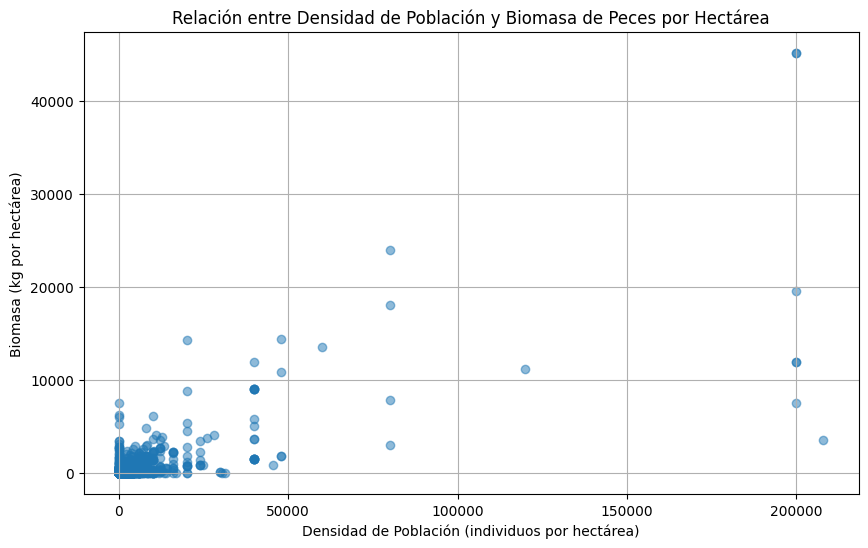

In [8]:
import matplotlib.pyplot as plt

# Selecciona las columnas 'density_ind_ha' y 'biomass_kg_ha' del DataFrame
density_data = dfFISH['density_ind_ha']
biomass_data = dfFISH['biomass_kg_ha']

# Crea el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(density_data, biomass_data, alpha=0.5)  # 'alpha' ajusta la transparencia de los puntos
plt.title('Relación entre Densidad de Población y Biomasa de Peces por Hectárea')
plt.xlabel('Densidad de Población (individuos por hectárea)')
plt.ylabel('Biomasa (kg por hectárea)')
plt.grid(True)

# Muestra el diagrama de dispersión
plt.show()


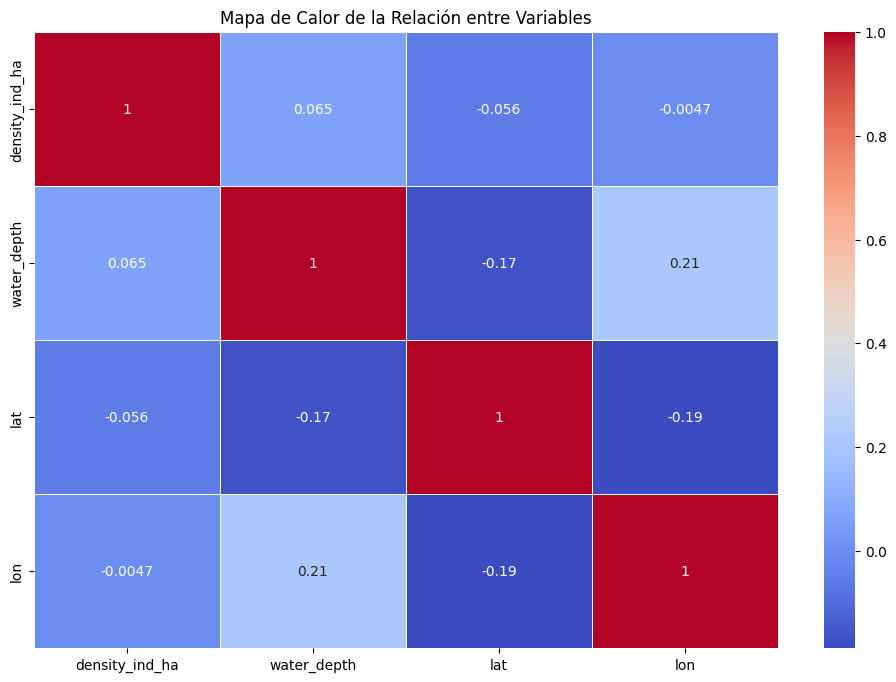

In [11]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar un archivo shapefile que contiene información geoespacial (por ejemplo, límites de países)
# Esto es solo un ejemplo; puedes utilizar tus propios datos geoespaciales si los tienes.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fusionar tus datos geoespaciales (por ejemplo, los límites de los países) con tus datos de densidad, profundidad, latitud, longitud y pendiente del arrecife
# Asegúrate de que tus datos tengan una columna común (por ejemplo, el nombre del país) que se pueda utilizar para fusionar.
merged_data = world.merge(dfFISH, left_on='name', right_on='country', how='inner')

# Seleccionar las variables de interés
variables_of_interest = ['density_ind_ha', 'water_depth', 'lat', 'lon', 'reef_slope']

# Crear un mapa de calor (heatmap) de la relación entre las variables seleccionadas
correlation_matrix = merged_data[variables_of_interest].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Relación entre Variables')
plt.show()


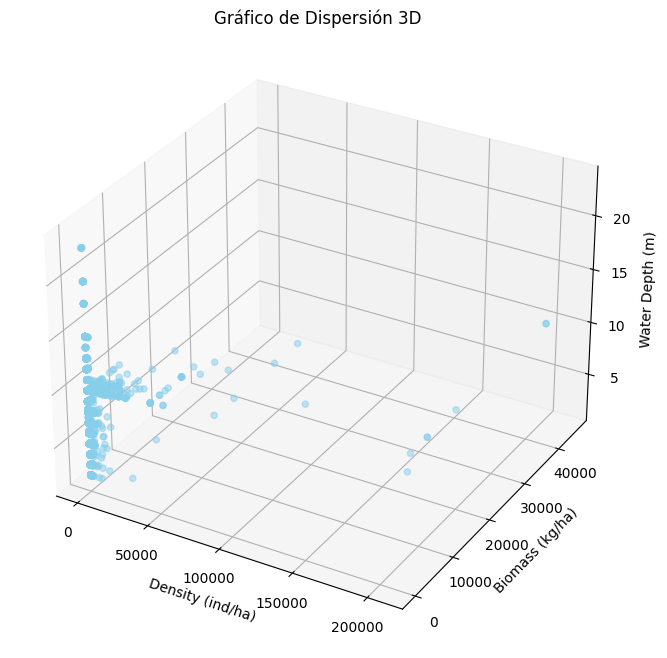

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crea una figura y un eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Variables para los ejes X, Y y Z
x = dfFISH['density_ind_ha']
y = dfFISH['biomass_kg_ha']
z = dfFISH['water_depth']

# Crea el gráfico de dispersión 3D
ax.scatter(x, y, z, c='skyblue', marker='o', alpha=0.5)

# Etiqueta de los ejes
ax.set_xlabel('Density (ind/ha)')
ax.set_ylabel('Biomass (kg/ha)')
ax.set_zlabel('Water Depth (m)')

# Título del gráfico
plt.title('Gráfico de Dispersión 3D')

# Muestra el gráfico
plt.show()


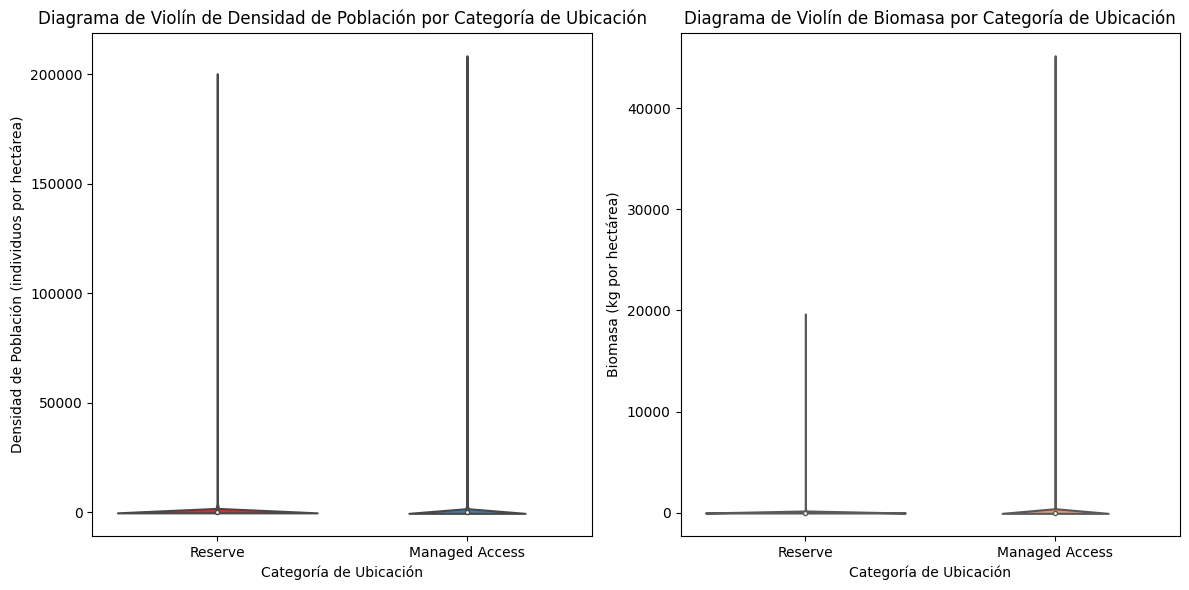

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un diagrama de violín para la densidad de población
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='location_status', y='density_ind_ha', data=dfFISH, palette='Set1')
plt.title('Diagrama de Violín de Densidad de Población por Categoría de Ubicación')
plt.xlabel('Categoría de Ubicación')
plt.ylabel('Densidad de Población (individuos por hectárea)')

# Crear un diagrama de violín para la biomasa
plt.subplot(1, 2, 2)
sns.violinplot(x='location_status', y='biomass_kg_ha', data=dfFISH, palette='Set2')
plt.title('Diagrama de Violín de Biomasa por Categoría de Ubicación')
plt.xlabel('Categoría de Ubicación')
plt.ylabel('Biomasa (kg por hectárea)')

plt.tight_layout()
plt.show()


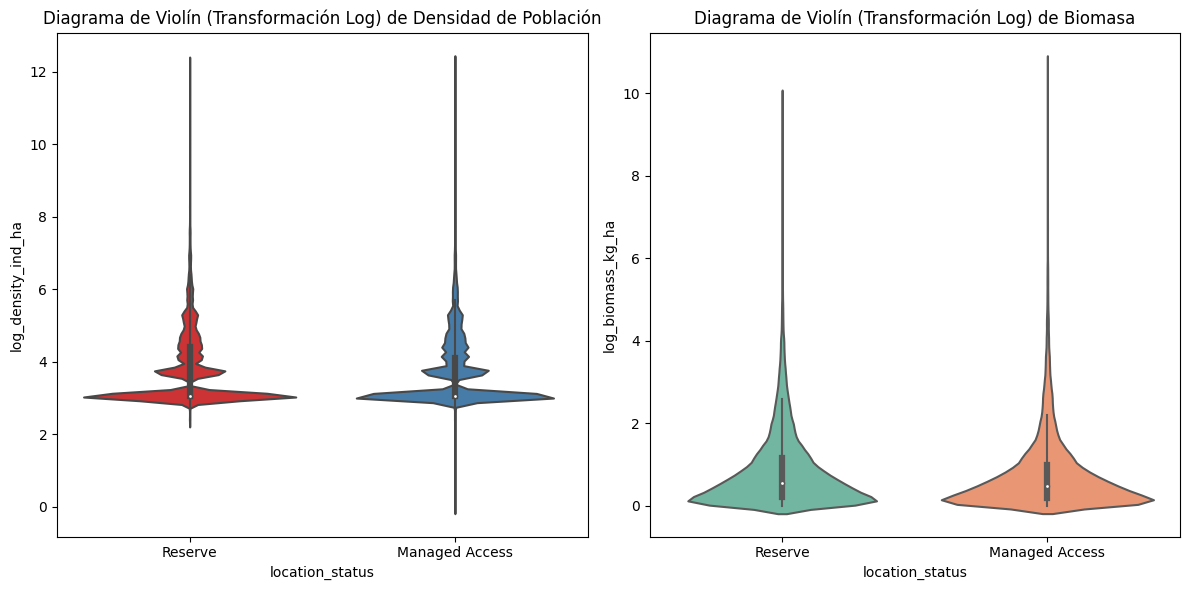

In [17]:
import numpy as np

# Aplicar una transformación logarítmica a las variables
dfFISH['log_density_ind_ha'] = np.log1p(dfFISH['density_ind_ha'])
dfFISH['log_biomass_kg_ha'] = np.log1p(dfFISH['biomass_kg_ha'])

# Crear diagramas de violín con las variables transformadas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='location_status', y='log_density_ind_ha', data=dfFISH, palette='Set1')
plt.title('Diagrama de Violín (Transformación Log) de Densidad de Población')

plt.subplot(1, 2, 2)
sns.violinplot(x='location_status', y='log_biomass_kg_ha', data=dfFISH, palette='Set2')
plt.title('Diagrama de Violín (Transformación Log) de Biomasa')

plt.tight_layout()
plt.show()


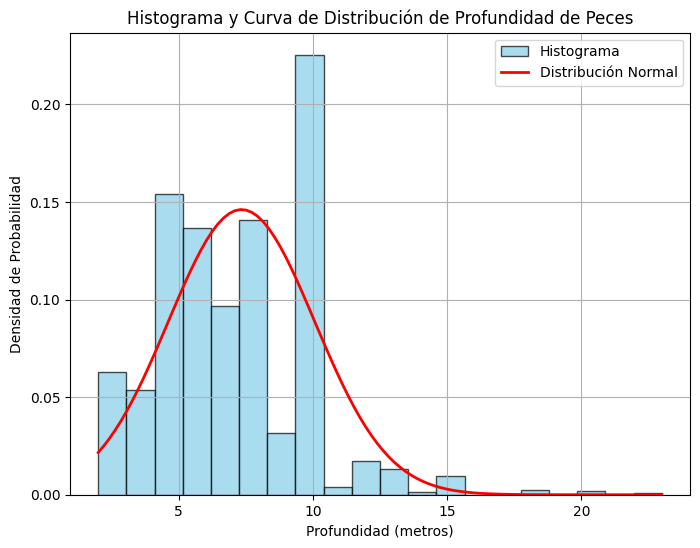

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Selecciona la columna de profundidad (water_depth) de tus datos
depth_data = dfFISH['water_depth']

# Crea un histograma
plt.figure(figsize=(8, 6))
plt.hist(depth_data, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histograma')

# Calcula la media y la desviación estándar de los datos de profundidad
mean_depth = np.mean(depth_data)
std_depth = np.std(depth_data)

# Crea una serie de valores para la curva de distribución normal
x = np.linspace(min(depth_data), max(depth_data), 100)
y = norm.pdf(x, mean_depth, std_depth)

# Plotea la curva de distribución normal
plt.plot(x, y, 'r-', linewidth=2, label='Distribución Normal')

plt.title('Histograma y Curva de Distribución de Profundidad de Peces')
plt.xlabel('Profundidad (metros)')
plt.ylabel('Densidad de Probabilidad')
plt.grid(True)
plt.legend()

# Muestra el histograma con la curva de distribución
plt.show()


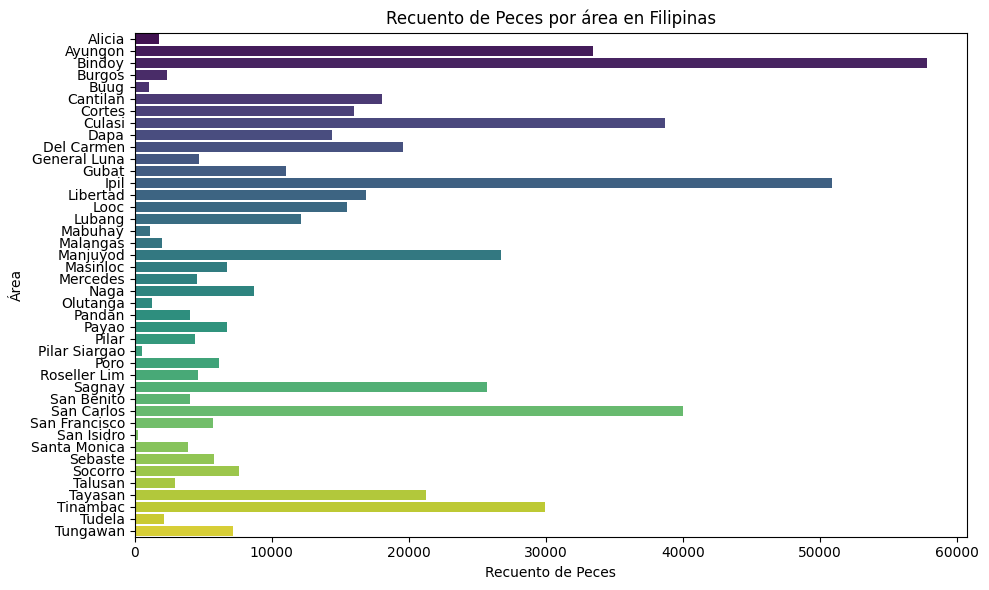

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra los datos para el país Filipinas
philippines_data = dfFISH[dfFISH['country'] == 'Philippines']

# Agrupa los datos por ma_name y suma los recuentos de peces
fish_counts = philippines_data.groupby('ma_name')['count'].sum().reset_index()

# Crea un gráfico de barras apiladas utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='ma_name', data=fish_counts, palette='viridis')
plt.xlabel('Recuento de Peces')
plt.ylabel('Área')
plt.title('Recuento de Peces por área en Filipinas')

# Muestra el gráfico
plt.tight_layout()
plt.show()


In [ ]:
'''
INTERPRETACIÓN DE GRÁFICOS

1.	En el primer diagrama de dispersión que muestra la relación que hay entre la biomasa de los peces y la densidad de población se puede ver que los datos están principalmente hacia la izquierda y hacia abajo, esto significa que existe una relación inversa o negativa entre las dos variables representadas en el gráfico. En otras palabras, a medida que una variable aumenta, la otra tiende a disminuir.
Esto quiere decir que cuando la biomasa de los peces aumenta, la densidad de población de peces disminuye
Esta relación inversa sugiere que hay un equilibrio entre la densidad de población y la biomasa de peces en los datos. En otras palabras, cuando hay una mayor densidad de población de peces en una determinada área (mayor cantidad de peces por hectárea), la biomasa individual tiende a ser menor, y viceversa. Esto podría deberse a factores como la competencia por recursos limitados, la disponibilidad de alimentos o la capacidad de carga del hábitat.
2.	En el siguiente mapa de calor se puede visualizar la relación que hay entre la densidad de población y la profundidad del mar, latitud, longitud y pendiente del arrecife.
Como podemos ver, hay una correlación fuerte entre las variables de latitud, longitud y profundidad, pero no con la densidad de población, que es nuestro principal enfoque.
3.	En este diagrama de dispersión 3D se puede visualizar la relación conjunta que hay entre la densidad de población, masa y profundidad de las aguas.
En esta gráfica se puede ver la relación inversa que hay entre cada variable. 
4.	Diagrama de violín que me muestra las diferencias que hay entre densidades de población y biomasa en los distintos estados de las localizaciones (Reserva o Acceso Controlado). En este gráfico en particular no se pueden ver los resultados pues hay unos pocos datos que están muy alejados, así que hace imposible de ver el gráfico. Para solucionar esto decidí hacer otro gráfico con los mismos datos, pero transformados a una escala logarítmica. 
5.	Diagrama de violín con datos transformados a escala logarítmica. Lo que se observa en esos gráficos es que no se percibe diferencia entre la densidad de población y biomasa en ambientes de reserva o de acceso controlado. 
6.	 En este histograma se puede ver cómo es la distribución de la población de peces por profundidad en las aguas.
A simple vista se puede ver que la distribución está desplazada y no estoy segura si obedece a una distribución normal, se tienen que hacer más análisis para poder definirlo.
7.	En este gráfico de barras se analizó la cantidad de peces por área en las Filipinas.

'''
